In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
cd C:\Users\SaquibRahman\OneDrive - TheMathCompany Private Limited\Desktop\Training\Python\NLP by campus X\quora-question-pairs_only-bow.ipynb at main · campusx-official_quora-question-pairs · GitHub_files\data

C:\Users\SaquibRahman\OneDrive - TheMathCompany Private Limited\Desktop\Training\Python\NLP by campus X\quora-question-pairs_only-bow.ipynb at main · campusx-official_quora-question-pairs · GitHub_files\data


In [5]:
df = pd.read_csv("train.csv")
df.shape

(404290, 6)

In [6]:
df.sample(10)

id    qid1    qid2  \
116556  116556  116583  189843   
344164  344164  472354  472355   
341253  341253  469053  119568   
284183  284183  404379  404380   
120771  120771  195843  195844   
46062    46062   18952   82436   
183260  183260   42810   31229   
393906  393906  526744  526745   
60705    60705  106123   30782   
196121  196121  296759  296760   

                                                question1  \
116556  What are some of the best places in India to v...   
344164  Why does Uranus not orbit anticlockwise like t...   
341253  *>||<* 1800><251><4919 *>||<* Cisco Router@@Te...   
284183  How do I install a custom Rom in Spice mettle ...   
120771        How does MeetMe define their target market?   
46062                               How do I gain weight?   
183260                    What is actual meaning of life?   
393906                Is it illegal for a 19 dating a 15?   
60705                  Porn Stars: Where is Shy Love now?   
196121    What are the health benefits of darjeeling tea?   

                                                question2  is_duplicate  
116556  What are some of the best places to visit in I...             1  
344164  How does the orbit of Uranus look like (from t...             0  
341253  What is cisco router technical support phone n...             0  
284183  How do I install a custom ROM in my rooted phone?             0  
120771       How does Twitter define their target market?             0  
46062   What is the best way for underweight to gain w...             1  
183260                  What is the meaning of this life?             1  
393906  I'm 36 year old man and in love with a 19 year...             0  
60705   How can you look at someone's private Instagra...             0  
196121  What are the health benefits of drinking Darje...             1

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [8]:
# missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [9]:
# duplicate rows
df.duplicated().sum()

0

0    255027
1    149263
Name: is_duplicate, dtype: int64
0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64


<AxesSubplot:>

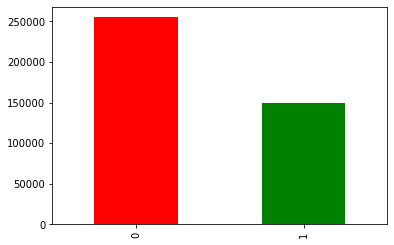

In [11]:
# Distribution of duplicate and non-duplicate questions
c= ['red', 'green']
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar', color = c)

In [69]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


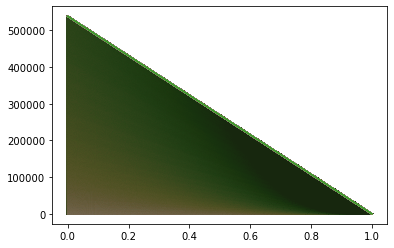

In [85]:
# a = np.unique(qid)
# lst = list(np.unique(a, return_counts=True))
# plt.plot(lst)
# plt.show()

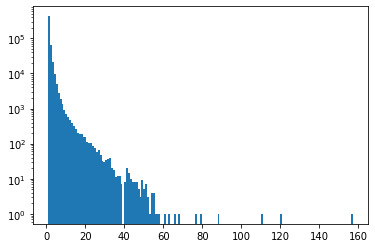

In [13]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

### using bag of words

In [15]:
new_df = df.sample(30000)

In [16]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [17]:
new_df.duplicated().sum()

0

In [18]:
ques_df = new_df[['question1','question2']]
ques_df.head()

question1  \
212317  Why do some educated people in developed count...   
376657       Can you be an atheist but believe in ghosts?   
278723  Why do some people have sweaty hands all the t...   
382943                  How do I approach a girl for sex?   
198249  What are some affordable tax law firms in Kara...   

                                                question2  
212317                           Why do people join ISIS?  
376657  Is it justified for an atheist to believe in g...  
278723              Why do some people have sweaty palms?  
382943           What is the best way to approach a girl?  
198249            What are some affordable tax law firms?

##### count vectorizer!

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [22]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [24]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [25]:
temp_df

0  1  2  3  4  5  6  7  8  9  ...  2991  2992  2993  2994  2995  2996  \
212317  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
376657  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
278723  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
382943  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
198249  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
...    .. .. .. .. .. .. .. .. .. ..  ...   ...   ...   ...   ...   ...   ...   
106526  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
91946   0  0  0  0  0  0  0  0  0  0  ...     1     0     0     0     0     0   
164002  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
60972   0  0  0  0  0  0  0  0  0  0  ...     3     0     0     1     0     0   
342272  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   

        2997  2998  2999  is_duplicate  
212317     0     0     0             0  
376657     0     0     0             1  
278723     0     0     0             1  
382943     0     0     0             0  
198249     0     0     0             0  
...      ...   ...   ...           ...  
106526     0     0     0             1  
91946      0     0     0             0  
164002     0     0     0             0  
60972      0     0     0             0  
342272     0     0     0             0  

[30000 rows x 6001 columns]

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

##### random forest & xgboost and lightbgm

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.736

In [29]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7376666666666667

In [30]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(X_train,y_train)
y_pred = lgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7348333333333333

#### BOW with basic feature engineering

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
new_df = df.sample(30000,random_state=2)
new_df

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   
...        ...     ...     ...   
243932  243932   26193  356455   
91980    91980  154063  154064   
266955  266955  133017  384210   
71112    71112  122427  122428   
312470  312470  436915  436916   

                                                question1  \
398782  What is the best marketing automation tool for...   
115086  I am poor but I want to invest. What should I do?   
327711  I am from India and live abroad. I met a guy f...   
367788  Why do so many people in the U.S. hate the sou...   
151235                Consequences of Bhopal gas tragedy?   
...                                                   ...   
243932         What are some good web scraping tutorials?   
91980   Can I apply for internet banking in SBI withou...   
266955  How much HE laundry detergent do you use in a ...   
71112   What is the best way to understand and learn m...   
312470  What would the Modi-led government do in case ...   

                                                question2  is_duplicate  
398782  What is the best marketing automation tool for...             1  
115086  I am quite poor and I want to be very rich. Wh...             0  
327711  T.I.E.T to Thapar University to Thapar Univers...             0  
367788  My boyfriend doesnt feel guilty when he hurts ...             0  
151235  What was the reason behind the Bhopal gas trag...             0  
...                                                   ...           ...  
243932          What are some good web scraping programs?             1  
91980   I have internet banking kit of SBI but it's no...             0  
266955  Can I use regular Dawn dishsoap in my dishwash...             0  
71112       What are some of the best ways to learn math?             1  
312470  If Pakistan mounts a 26/11 type attack again, ...             1  

[30000 rows x 6 columns]

In [35]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [38]:
new_df.duplicated().sum()

0

0    19013
1    10987
Name: is_duplicate, dtype: int64
0    63.376667
1    36.623333
Name: is_duplicate, dtype: float64


<AxesSubplot:>

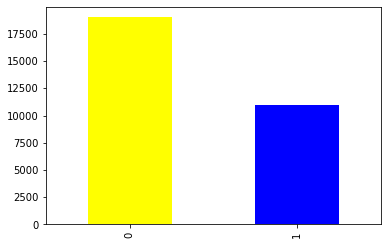

In [40]:
# Distribution of duplicate and non-duplicate questions
c= ['yellow', 'blue']
print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar', color =c)

In [41]:
# Repeated questions

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 55299
Number of questions getting repeated 3480


In [88]:
qid

0              1
1              3
2              5
3              7
4              9
           ...  
808575    379845
808576    155606
808577    537929
808578    537931
808579    537933
Length: 808580, dtype: int64

In [87]:
55299+3480

58779

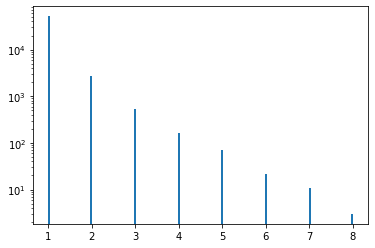

In [42]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [43]:
# Feature Engineering

new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [44]:
new_df.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  What is the best marketing automation tool for...   
115086  I am poor but I want to invest. What should I do?   
327711  I am from India and live abroad. I met a guy f...   
367788  Why do so many people in the U.S. hate the sou...   
151235                Consequences of Bhopal gas tragedy?   

                                                question2  is_duplicate  \
398782  What is the best marketing automation tool for...             1   
115086  I am quite poor and I want to be very rich. Wh...             0   
327711  T.I.E.T to Thapar University to Thapar Univers...             0   
367788  My boyfriend doesnt feel guilty when he hurts ...             0   
151235  What was the reason behind the Bhopal gas trag...             0   

        q1_len  q2_len  
398782      76      77  
115086      49      57  
327711     105     120  
367788      59     146  
151235      35      50

In [45]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  What is the best marketing automation tool for...   
115086  I am poor but I want to invest. What should I do?   
327711  I am from India and live abroad. I met a guy f...   
367788  Why do so many people in the U.S. hate the sou...   
151235                Consequences of Bhopal gas tragedy?   

                                                question2  is_duplicate  \
398782  What is the best marketing automation tool for...             1   
115086  I am quite poor and I want to be very rich. Wh...             0   
327711  T.I.E.T to Thapar University to Thapar Univers...             0   
367788  My boyfriend doesnt feel guilty when he hurts ...             0   
151235  What was the reason behind the Bhopal gas trag...             0   

        q1_len  q2_len  q1_num_words  q2_num_words  
398782      76      77            12            12  
115086      49      57            12            15  
327711     105     120            25            17  
367788      59     146            12            30  
151235      35      50             5             9

In [46]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [47]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  What is the best marketing automation tool for...   
115086  I am poor but I want to invest. What should I do?   
327711  I am from India and live abroad. I met a guy f...   
367788  Why do so many people in the U.S. hate the sou...   
151235                Consequences of Bhopal gas tragedy?   

                                                question2  is_duplicate  \
398782  What is the best marketing automation tool for...             1   
115086  I am quite poor and I want to be very rich. Wh...             0   
327711  T.I.E.T to Thapar University to Thapar Univers...             0   
367788  My boyfriend doesnt feel guilty when he hurts ...             0   
151235  What was the reason behind the Bhopal gas trag...             0   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  
398782      76      77            12            12           11  
115086      49      57            12            15            7  
327711     105     120            25            17            2  
367788      59     146            12            30            0  
151235      35      50             5             9            3

In [93]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))
    print(len(w1))

In [49]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  What is the best marketing automation tool for...   
115086  I am poor but I want to invest. What should I do?   
327711  I am from India and live abroad. I met a guy f...   
367788  Why do so many people in the U.S. hate the sou...   
151235                Consequences of Bhopal gas tragedy?   

                                                question2  is_duplicate  \
398782  What is the best marketing automation tool for...             1   
115086  I am quite poor and I want to be very rich. Wh...             0   
327711  T.I.E.T to Thapar University to Thapar Univers...             0   
367788  My boyfriend doesnt feel guilty when he hurts ...             0   
151235  What was the reason behind the Bhopal gas trag...             0   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  
398782      76      77            12            12           11          24  
115086      49      57            12            15            7          23  
327711     105     120            25            17            2          34  
367788      59     146            12            30            0          32  
151235      35      50             5             9            3          13

In [50]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  What is the best marketing automation tool for...   
115086  I am poor but I want to invest. What should I do?   
327711  I am from India and live abroad. I met a guy f...   
367788  Why do so many people in the U.S. hate the sou...   
151235                Consequences of Bhopal gas tragedy?   

                                                question2  is_duplicate  \
398782  What is the best marketing automation tool for...             1   
115086  I am quite poor and I want to be very rich. Wh...             0   
327711  T.I.E.T to Thapar University to Thapar Univers...             0   
367788  My boyfriend doesnt feel guilty when he hurts ...             0   
151235  What was the reason behind the Bhopal gas trag...             0   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  \
398782      76      77            12            12           11          24   
115086      49      57            12            15            7          23   
327711     105     120            25            17            2          34   
367788      59     146            12            30            0          32   
151235      35      50             5             9            3          13   

        word_share  
398782        0.46  
115086        0.30  
327711        0.06  
367788        0.00  
151235        0.23

minimum characters 2
maximum characters 391
average num of characters 59


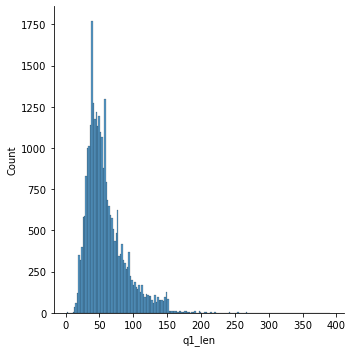

In [51]:
# Analysis of features
sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

minimum characters 6
maximum characters 1151
average num of characters 60


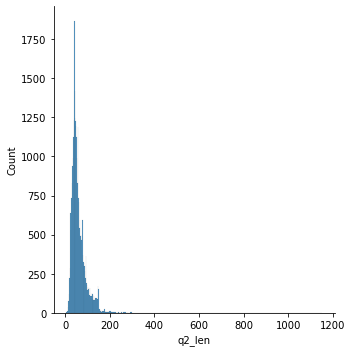

In [52]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

minimum words 1
maximum words 72
average num of words 10


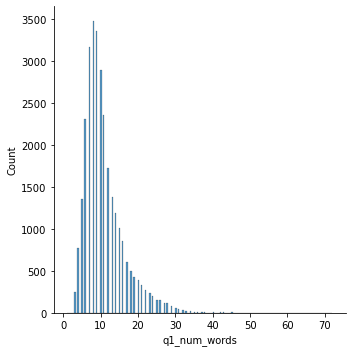

In [53]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

minimum words 1
maximum words 237
average num of words 11


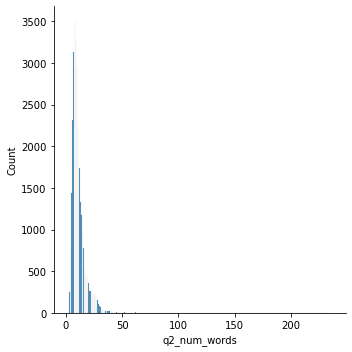

In [54]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

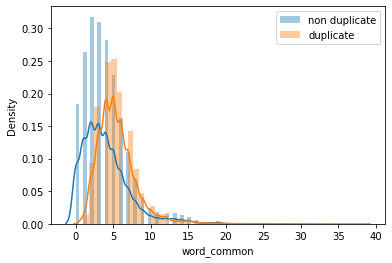

In [55]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

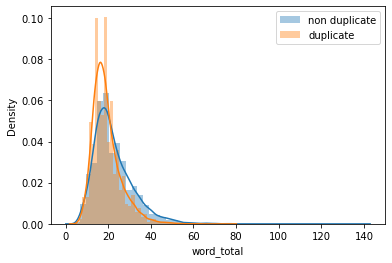

In [56]:
# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

In [108]:
new_df[new_df['is_duplicate'] == 0]['word_total'][:5]

115086    23
327711    34
367788    32
151235    13
244531    25
Name: word_total, dtype: int64

In [109]:
new_df[new_df['is_duplicate'] == 0]['word_common'][:5]

115086    7
327711    2
367788    0
151235    3
244531    1
Name: word_common, dtype: int64

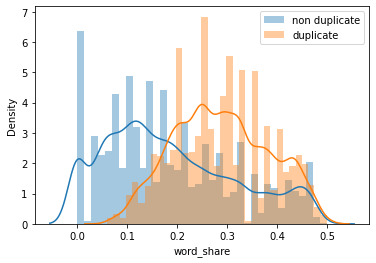

In [57]:
# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [58]:
ques_df = new_df[['question1','question2']]
ques_df.head()

question1  \
398782  What is the best marketing automation tool for...   
115086  I am poor but I want to invest. What should I do?   
327711  I am from India and live abroad. I met a guy f...   
367788  Why do so many people in the U.S. hate the sou...   
151235                Consequences of Bhopal gas tragedy?   

                                                question2  
398782  What is the best marketing automation tool for...  
115086  I am quite poor and I want to be very rich. Wh...  
327711  T.I.E.T to Thapar University to Thapar Univers...  
367788  My boyfriend doesnt feel guilty when he hurts ...  
151235  What was the reason behind the Bhopal gas trag...

In [59]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
398782             1      76      77            12            12           11   
115086             0      49      57            12            15            7   
327711             0     105     120            25            17            2   
367788             0      59     146            12            30            0   
151235             0      35      50             5             9            3   

        word_total  word_share  
398782          24        0.46  
115086          23        0.30  
327711          34        0.06  
367788          32        0.00  
151235          13        0.23

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [61]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [62]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
398782             1      76      77            12            12           11   
115086             0      49      57            12            15            7   
327711             0     105     120            25            17            2   
367788             0      59     146            12            30            0   
151235             0      35      50             5             9            3   

        word_total  word_share  0  1  ...  2990  2991  2992  2993  2994  2995  \
398782          24        0.46  0  0  ...     0     0     0     0     0     0   
115086          23        0.30  0  0  ...     0     0     0     0     0     0   
327711          34        0.06  0  0  ...     0     0     0     0     0     0   
367788          32        0.00  0  0  ...     0     0     0     1     0     0   
151235          13        0.23  0  0  ...     0     0     0     0     0     0   

        2996  2997  2998  2999  
398782     0     0     0     0  
115086     0     0     0     0  
327711     0     0     0     0  
367788     0     0     0     0  
151235     0     0     0     0  

[5 rows x 6008 columns]

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.77

In [65]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7645

In [66]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(X_train,y_train)
y_pred = lgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7691666666666667

### advance feature engineering!

In [110]:
# <!-- 
# 1. Token Features
# cwc_min: This is the ratio of the number of common words to the length of the smaller question
# cwc_max: This is the ratio of the number of common words to the length of the larger question
# csc_min: This is the ratio of the number of common stop words to the smaller stop word count among the two questions
# csc_max: This is the ratio of the number of common stop words to the larger stop word count among the two questions
# ctc_min: This is the ratio of the number of common tokens to the smaller token count among the two questions
# ctc_max: This is the ratio of the number of common tokens to the larger token count among the two questions
# last_word_eq: 1 if the last word in the two questions is same, 0 otherwise
# first_word_eq: 1 if the first word in the two questions is same, 0 otherwise

# 2. Length Based Features
# mean_len: Mean of the length of the two questions (number of words)
# abs_len_diff: Absolute difference between the length of the two questions (number of words)
# longest_substr_ratio: Ratio of the length of the longest substring among the two questions to the length of the smaller question

# 3. Fuzzy Features
# fuzz_ratio: fuzz_ratio score from fuzzywuzzy
# fuzz_partial_ratio: fuzz_partial_ratio from fuzzywuzzy
# token_sort_ratio: token_sort_ratio from fuzzywuzzy
# token_set_ratio: token_set_ratio from fuzzywuzzy --> -->

In [116]:
import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [115]:
new_df =df.sample(30000, random_state=1)
new_df.head()

id    qid1    qid2  \
237030  237030   33086  348102   
247341  247341   73272    8624   
246425  246425  359482  359483   
306985  306985    1357   47020   
225863  225863  334315  334316   

                                                question1  \
237030                How can I stop playing video games?   
247341     Who is better Donald Trump or Hillary Clinton?   
246425  What do you think is the chance that sometime ...   
306985  Why are so many questions posted to Quora that...   
225863  Can there even be a movie ever rated 10/10 on ...   

                                                question2  is_duplicate  
237030   Should I stop playing video games with my child?             0  
247341  Why is Hillary Clinton a better choice than Do...             1  
246425  Do you think there will be another world war/n...             1  
306985  Why do people write questions on Quora that co...             1  
225863                        What are your 10/10 movies?             0

In [146]:
new_df.nunique()

id                      30000
qid1                    28408
qid2                    28335
question1               28389
question2               28311
is_duplicate                2
q1_len                    248
q2_len                    281
q1_num_words               64
q2_num_words               79
word_common                30
word_total                 75
word_share                 50
cwc_min                   125
cwc_max                   197
csc_min                   118
csc_max                   207
ctc_min                   410
ctc_max                   652
last_word_eq                2
first_word_eq               2
abs_len_diff               52
mean_len                   98
longest_substr_ratio     2645
fuzz_ratio                101
fuzz_partial_ratio         92
token_sort_ratio          101
token_set_ratio            98
dtype: int64

In [117]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q

In [118]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

In [119]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [120]:
new_df.head()

id    qid1    qid2  \
237030  237030   33086  348102   
247341  247341   73272    8624   
246425  246425  359482  359483   
306985  306985    1357   47020   
225863  225863  334315  334316   

                                                question1  \
237030                 how can i stop playing video games   
247341      who is better donald trump or hillary clinton   
246425  what do you think is the chance that sometime ...   
306985  why are so many questions posted to quora that...   
225863  can there even be a movie ever rated 10 10 on ...   

                                                question2  is_duplicate  
237030    should i stop playing video games with my child             0  
247341  why is hillary clinton a better choice than do...             1  
246425  do you think there will be another world war n...             1  
306985  why do people write questions on quora that co...             1  
225863                         what are your 10 10 movies             0

In [121]:
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [122]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

id    qid1    qid2  \
237030  237030   33086  348102   
247341  247341   73272    8624   
246425  246425  359482  359483   
306985  306985    1357   47020   
225863  225863  334315  334316   

                                                question1  \
237030                 how can i stop playing video games   
247341      who is better donald trump or hillary clinton   
246425  what do you think is the chance that sometime ...   
306985  why are so many questions posted to quora that...   
225863  can there even be a movie ever rated 10 10 on ...   

                                                question2  is_duplicate  \
237030    should i stop playing video games with my child             0   
247341  why is hillary clinton a better choice than do...             1   
246425  do you think there will be another world war n...             1   
306985  why do people write questions on quora that co...             1   
225863                         what are your 10 10 movies             0   

        q1_len  q2_len  q1_num_words  q2_num_words  
237030      34      47             7             9  
247341      45      56             8            10  
246425     137      76            29            15  
306985      85      85            16            16  
225863      50      26            12             6

In [123]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [124]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

id    qid1    qid2  \
237030  237030   33086  348102   
247341  247341   73272    8624   
246425  246425  359482  359483   
306985  306985    1357   47020   
225863  225863  334315  334316   

                                                question1  \
237030                 how can i stop playing video games   
247341      who is better donald trump or hillary clinton   
246425  what do you think is the chance that sometime ...   
306985  why are so many questions posted to quora that...   
225863  can there even be a movie ever rated 10 10 on ...   

                                                question2  is_duplicate  \
237030    should i stop playing video games with my child             0   
247341  why is hillary clinton a better choice than do...             1   
246425  do you think there will be another world war n...             1   
306985  why do people write questions on quora that co...             1   
225863                         what are your 10 10 movies             0   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  
237030      34      47             7             9            5  
247341      45      56             8            10            6  
246425     137      76            29            15           13  
306985      85      85            16            16            5  
225863      50      26            12             6            1

In [125]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [126]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

id    qid1    qid2  \
237030  237030   33086  348102   
247341  247341   73272    8624   
246425  246425  359482  359483   
306985  306985    1357   47020   
225863  225863  334315  334316   

                                                question1  \
237030                 how can i stop playing video games   
247341      who is better donald trump or hillary clinton   
246425  what do you think is the chance that sometime ...   
306985  why are so many questions posted to quora that...   
225863  can there even be a movie ever rated 10 10 on ...   

                                                question2  is_duplicate  \
237030    should i stop playing video games with my child             0   
247341  why is hillary clinton a better choice than do...             1   
246425  do you think there will be another world war n...             1   
306985  why do people write questions on quora that co...             1   
225863                         what are your 10 10 movies             0   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  
237030      34      47             7             9            5          16  
247341      45      56             8            10            6          18  
246425     137      76            29            15           13          40  
306985      85      85            16            16            5          30  
225863      50      26            12             6            1          16

In [127]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()


id    qid1    qid2  \
237030  237030   33086  348102   
247341  247341   73272    8624   
246425  246425  359482  359483   
306985  306985    1357   47020   
225863  225863  334315  334316   

                                                question1  \
237030                 how can i stop playing video games   
247341      who is better donald trump or hillary clinton   
246425  what do you think is the chance that sometime ...   
306985  why are so many questions posted to quora that...   
225863  can there even be a movie ever rated 10 10 on ...   

                                                question2  is_duplicate  \
237030    should i stop playing video games with my child             0   
247341  why is hillary clinton a better choice than do...             1   
246425  do you think there will be another world war n...             1   
306985  why do people write questions on quora that co...             1   
225863                         what are your 10 10 movies             0   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  \
237030      34      47             7             9            5          16   
247341      45      56             8            10            6          18   
246425     137      76            29            15           13          40   
306985      85      85            16            16            5          30   
225863      50      26            12             6            1          16   

        word_share  
237030        0.31  
247341        0.33  
246425        0.32  
306985        0.17  
225863        0.06

In [128]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [129]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [130]:
new_df

id    qid1    qid2  \
237030  237030   33086  348102   
247341  247341   73272    8624   
246425  246425  359482  359483   
306985  306985    1357   47020   
225863  225863  334315  334316   
...        ...     ...     ...   
298455  298455   88357  148625   
16366    16366   31205   31206   
379818  379818   11786  511366   
54795    54795   96691   96692   
335036  335036  462289  462290   

                                                question1  \
237030                 how can i stop playing video games   
247341      who is better donald trump or hillary clinton   
246425  what do you think is the chance that sometime ...   
306985  why are so many questions posted to quora that...   
225863  can there even be a movie ever rated 10 10 on ...   
...                                                   ...   
298455  why is donald trump still  ducking  his income...   
16366   how often do women get wet when they see a rea...   
379818  how do i disable  voice data for text to speec...   
54795                     how does mildew form on carpets   
335036                            how do i leave a legacy   

                                                question2  is_duplicate  \
237030    should i stop playing video games with my child             0   
247341  why is hillary clinton a better choice than do...             1   
246425  do you think there will be another world war n...             1   
306985  why do people write questions on quora that co...             1   
225863                         what are your 10 10 movies             0   
...                                                   ...           ...   
298455  why does not trump begin speaking the  truth  ...             1   
16366   how often do women initiate a conversation wit...             0   
379818  how do i convert call center recordings into t...             0   
54795   how can you prevent mildew from forming on car...             0   
335036         how do you leave a legacy to your children             0   

        q1_len  q2_len  q1_num_words  q2_num_words  ...  word_total  \
237030      34      47             7             9  ...          16   
247341      45      56             8            10  ...          18   
246425     137      76            29            15  ...          40   
306985      85      85            16            16  ...          30   
225863      50      26            12             6  ...          16   
...        ...     ...           ...           ...  ...         ...   
298455      63      74            13            15  ...          26   
16366       57      90            13            17  ...          29   
379818      72     148            15            28  ...          42   
54795       31      50             6             9  ...          15   
335036      23      42             6             9  ...          15   

        word_share   cwc_min   cwc_max   csc_min   csc_max   ctc_min  \
237030        0.31  0.999975  0.799984  0.333322  0.249994  0.714276   
247341        0.33  0.999980  0.833319  0.333322  0.249994  0.749991   
246425        0.32  0.857131  0.499996  0.999986  0.538457  0.866661   
306985        0.17  0.374995  0.333330  0.333328  0.285710  0.312498   
225863        0.06  0.499975  0.166664  0.000000  0.000000  0.166664   
...            ...       ...       ...       ...       ...       ...   
298455        0.19  0.285710  0.249997  0.666644  0.333328  0.363633   
16366         0.28  0.499994  0.444440  0.799984  0.571420  0.615380   
379818        0.17  0.428565  0.187499  0.499992  0.272725  0.461535   
54795         0.27  0.666644  0.499988  0.666644  0.399992  0.666656   
335036        0.33  0.999950  0.666644  0.749981  0.499992  0.833319   

         ctc_max  last_word_eq  first_word_eq  
237030  0.555549           0.0            0.0  
247341  0.599994           0.0            0.0  
246425  0.464284           0.0            0.0  
306985  0.312498           0.0            1.0  
225863  0.0

In [133]:
# !pip install distance

In [134]:
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features
    

In [135]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [136]:
new_df.head()

id    qid1    qid2  \
237030  237030   33086  348102   
247341  247341   73272    8624   
246425  246425  359482  359483   
306985  306985    1357   47020   
225863  225863  334315  334316   

                                                question1  \
237030                 how can i stop playing video games   
247341      who is better donald trump or hillary clinton   
246425  what do you think is the chance that sometime ...   
306985  why are so many questions posted to quora that...   
225863  can there even be a movie ever rated 10 10 on ...   

                                                question2  is_duplicate  \
237030    should i stop playing video games with my child             0   
247341  why is hillary clinton a better choice than do...             1   
246425  do you think there will be another world war n...             1   
306985  why do people write questions on quora that co...             1   
225863                         what are your 10 10 movies             0   

        q1_len  q2_len  q1_num_words  q2_num_words  ...   cwc_max   csc_min  \
237030      34      47             7             9  ...  0.799984  0.333322   
247341      45      56             8            10  ...  0.833319  0.333322   
246425     137      76            29            15  ...  0.499996  0.999986   
306985      85      85            16            16  ...  0.333330  0.333328   
225863      50      26            12             6  ...  0.166664  0.000000   

         csc_max   ctc_min   ctc_max  last_word_eq  first_word_eq  \
237030  0.249994  0.714276  0.555549           0.0            0.0   
247341  0.249994  0.749991  0.599994           0.0            0.0   
246425  0.538457  0.866661  0.464284           0.0            0.0   
306985  0.285710  0.312498  0.312498           0.0            1.0   
225863  0.000000  0.166664  0.083333           0.0            0.0   

        abs_len_diff  mean_len  longest_substr_ratio  
237030           2.0       8.0              0.771429  
247341           2.0       9.0              0.347826  
246425          13.0      21.5              0.298701  
306985           0.0      16.0              0.139535  
225863           6.0       9.0              0.259259  

[5 rows x 24 columns]

In [139]:
# !pip install fuzzywuzzy

In [140]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [141]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [142]:
print(new_df.shape)
new_df.head()

(30000, 28)


id    qid1    qid2  \
237030  237030   33086  348102   
247341  247341   73272    8624   
246425  246425  359482  359483   
306985  306985    1357   47020   
225863  225863  334315  334316   

                                                question1  \
237030                 how can i stop playing video games   
247341      who is better donald trump or hillary clinton   
246425  what do you think is the chance that sometime ...   
306985  why are so many questions posted to quora that...   
225863  can there even be a movie ever rated 10 10 on ...   

                                                question2  is_duplicate  \
237030    should i stop playing video games with my child             0   
247341  why is hillary clinton a better choice than do...             1   
246425  do you think there will be another world war n...             1   
306985  why do people write questions on quora that co...             1   
225863                         what are your 10 10 movies             0   

        q1_len  q2_len  q1_num_words  q2_num_words  ...   ctc_max  \
237030      34      47             7             9  ...  0.555549   
247341      45      56             8            10  ...  0.599994   
246425     137      76            29            15  ...  0.464284   
306985      85      85            16            16  ...  0.312498   
225863      50      26            12             6  ...  0.083333   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  \
237030           0.0            0.0           2.0       8.0   
247341           0.0            0.0           2.0       9.0   
246425           0.0            0.0          13.0      21.5   
306985           0.0            1.0           0.0      16.0   
225863           0.0            0.0           6.0       9.0   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
237030              0.771429          72                  85   
247341              0.347826          42                  49   
246425              0.298701          46                  55   
306985              0.139535          53                  53   
225863              0.259259          42                  46   

        token_sort_ratio  token_set_ratio  
237030                69               87  
247341                83               92  
246425                70               94  
306985                51               59  
225863                50               46  

[5 rows x 28 columns]

In [143]:
new_df

id    qid1    qid2  \
237030  237030   33086  348102   
247341  247341   73272    8624   
246425  246425  359482  359483   
306985  306985    1357   47020   
225863  225863  334315  334316   
...        ...     ...     ...   
298455  298455   88357  148625   
16366    16366   31205   31206   
379818  379818   11786  511366   
54795    54795   96691   96692   
335036  335036  462289  462290   

                                                question1  \
237030                 how can i stop playing video games   
247341      who is better donald trump or hillary clinton   
246425  what do you think is the chance that sometime ...   
306985  why are so many questions posted to quora that...   
225863  can there even be a movie ever rated 10 10 on ...   
...                                                   ...   
298455  why is donald trump still  ducking  his income...   
16366   how often do women get wet when they see a rea...   
379818  how do i disable  voice data for text to speec...   
54795                     how does mildew form on carpets   
335036                            how do i leave a legacy   

                                                question2  is_duplicate  \
237030    should i stop playing video games with my child             0   
247341  why is hillary clinton a better choice than do...             1   
246425  do you think there will be another world war n...             1   
306985  why do people write questions on quora that co...             1   
225863                         what are your 10 10 movies             0   
...                                                   ...           ...   
298455  why does not trump begin speaking the  truth  ...             1   
16366   how often do women initiate a conversation wit...             0   
379818  how do i convert call center recordings into t...             0   
54795   how can you prevent mildew from forming on car...             0   
335036         how do you leave a legacy to your children             0   

        q1_len  q2_len  q1_num_words  q2_num_words  ...   ctc_max  \
237030      34      47             7             9  ...  0.555549   
247341      45      56             8            10  ...  0.599994   
246425     137      76            29            15  ...  0.464284   
306985      85      85            16            16  ...  0.312498   
225863      50      26            12             6  ...  0.083333   
...        ...     ...           ...           ...  ...       ...   
298455      63      74            13            15  ...  0.307690   
16366       57      90            13            17  ...  0.470585   
379818      72     148            15            28  ...  0.222221   
54795       31      50             6             9  ...  0.444440   
335036      23      42             6             9  ...  0.555549   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  \
237030           0.0            0.0           2.0       8.0   
247341           0.0            0.0           2.0       9.0   
246425           0.0            0.0          13.0      21.5   
306985           0.0            1.0           0.0      16.0   
225863           0.0            0.0           6.0       9.0   
...              ...            ...           ...       ...   
298455           0.0            1.0           2.0      12.0   
16366            0.0            1.0           4.0      15.0   
379818           0.0            1.0          14.0      20.0   
54795            1.0            1.0           3.0       7.5   
335036           0.0            1.0           3.0       7.5   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
237030              0.771429          72                  85   
247341              0.347826          42                  49   
246425              0.298701          46                  55   
306985              0.139535          53                  53   
225863              0.259259          42                  46   

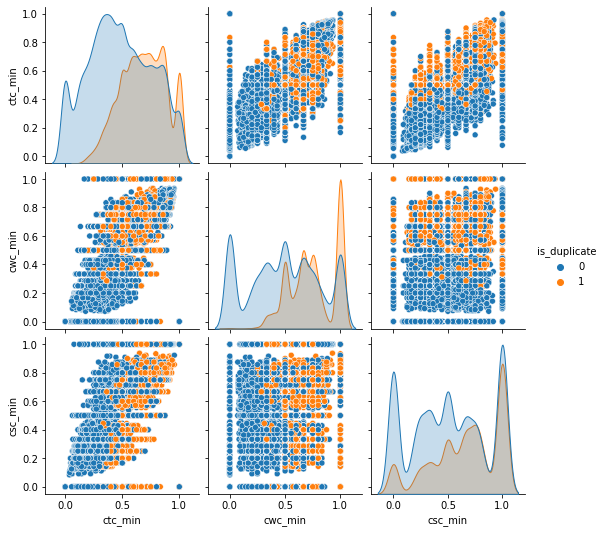

In [153]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')


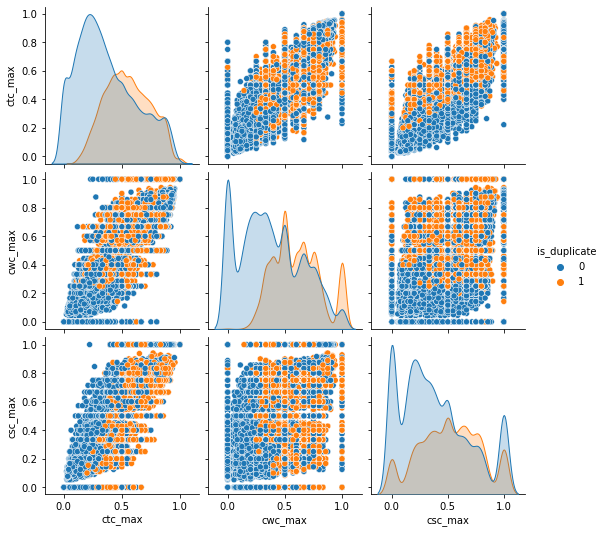

In [154]:
sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')


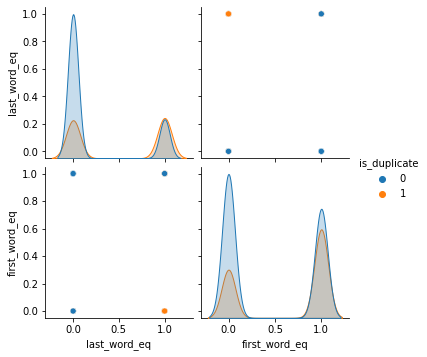

In [155]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')


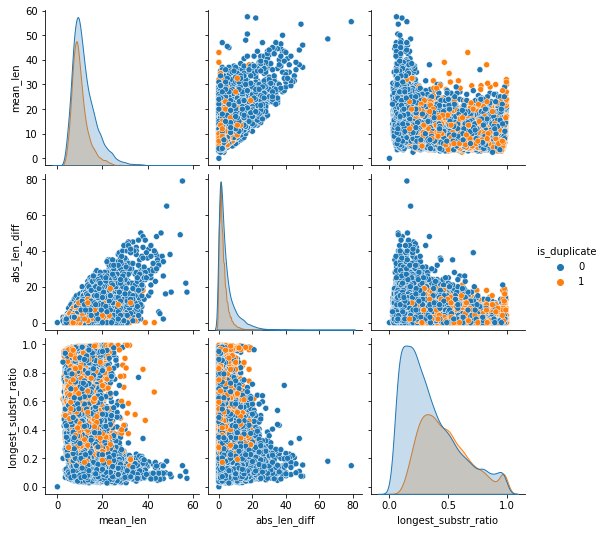

In [156]:
sns.pairplot(new_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')


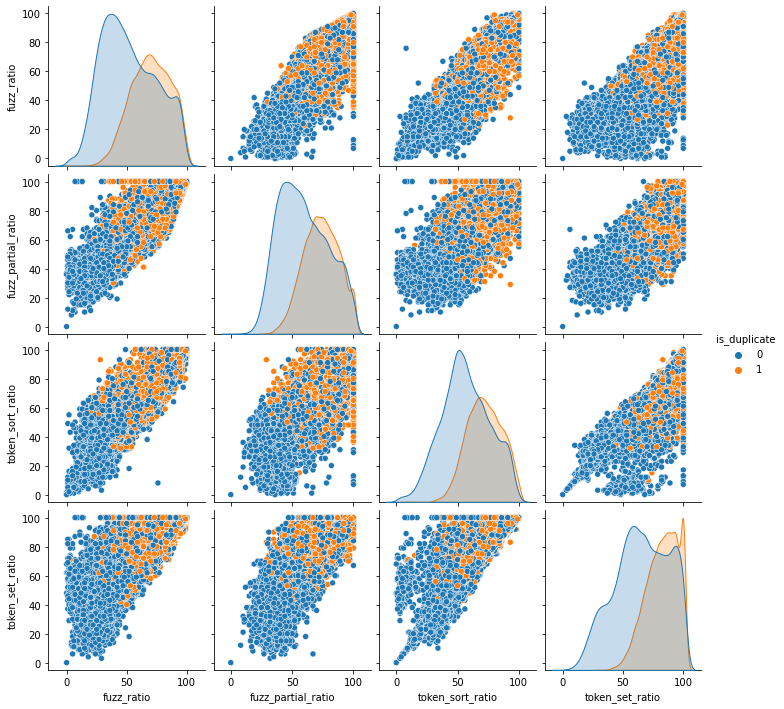

In [157]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')


In [158]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = new_df['is_duplicate'].values

In [159]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.159s...
[t-SNE] Computed neighbors for 30000 samples in 6.390s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

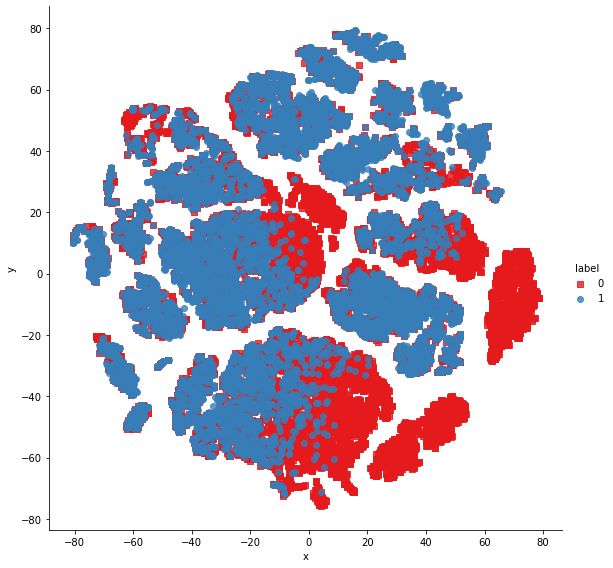

In [160]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])

In [161]:
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.170s...
[t-SNE] Computed neighbors for 30000 samples in 8.881s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

In [162]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [163]:
ques_df = new_df[['question1','question2']]
ques_df.head()

question1  \
237030                 how can i stop playing video games   
247341      who is better donald trump or hillary clinton   
246425  what do you think is the chance that sometime ...   
306985  why are so many questions posted to quora that...   
225863  can there even be a movie ever rated 10 10 on ...   

                                                question2  
237030    should i stop playing video games with my child  
247341  why is hillary clinton a better choice than do...  
246425  do you think there will be another world war n...  
306985  why do people write questions on quora that co...  
225863                         what are your 10 10 movies

In [164]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 23)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
237030             0      34      47             7             9            5   
247341             1      45      56             8            10            6   
246425             1     137      76            29            15           13   
306985             1      85      85            16            16            5   
225863             0      50      26            12             6            1   

        word_total  word_share   cwc_min   cwc_max  ...   ctc_max  \
237030          16        0.31  0.999975  0.799984  ...  0.555549   
247341          18        0.33  0.999980  0.833319  ...  0.599994   
246425          40        0.32  0.857131  0.499996  ...  0.464284   
306985          30        0.17  0.374995  0.333330  ...  0.312498   
225863          16        0.06  0.499975  0.166664  ...  0.083333   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  \
237030           0.0            0.0           2.0       8.0   
247341           0.0            0.0           2.0       9.0   
246425           0.0            0.0          13.0      21.5   
306985           0.0            1.0           0.0      16.0   
225863           0.0            0.0           6.0       9.0   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
237030              0.771429          72                  85   
247341              0.347826          42                  49   
246425              0.298701          46                  55   
306985              0.139535          53                  53   
225863              0.259259          42                  46   

        token_sort_ratio  token_set_ratio  
237030                69               87  
247341                83               92  
246425                70               94  
306985                51               59  
225863                50               46  

[5 rows x 23 columns]

In [165]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [166]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [167]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6023)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
237030             0      34      47             7             9            5   
247341             1      45      56             8            10            6   
246425             1     137      76            29            15           13   
306985             1      85      85            16            16            5   
225863             0      50      26            12             6            1   

        word_total  word_share   cwc_min   cwc_max  ...  2990  2991  2992  \
237030          16        0.31  0.999975  0.799984  ...     0     0     0   
247341          18        0.33  0.999980  0.833319  ...     0     0     0   
246425          40        0.32  0.857131  0.499996  ...     0     1     0   
306985          30        0.17  0.374995  0.333330  ...     0     0     0   
225863          16        0.06  0.499975  0.166664  ...     0     0     0   

        2993  2994  2995  2996  2997  2998  2999  
237030     0     0     0     0     0     0     0  
247341     0     0     0     0     0     0     0  
246425     0     0     0     0     0     0     0  
306985     0     0     0     0     0     0     0  
225863     0     1     0     0     0     0     0  

[5 rows x 6023 columns]

In [168]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [169]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.785

In [212]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      3810
           1       0.72      0.68      0.70      2190

    accuracy                           0.79      6000
   macro avg       0.77      0.76      0.77      6000
weighted avg       0.78      0.79      0.78      6000



In [170]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.785

In [211]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      3810
           1       0.70      0.71      0.71      2190

    accuracy                           0.79      6000
   macro avg       0.77      0.77      0.77      6000
weighted avg       0.79      0.79      0.79      6000



In [171]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(X_train,y_train)
y_pred2 = lgb.predict(X_test)
accuracy_score(y_test,y_pred2)

0.7911666666666667

In [210]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      3810
           1       0.71      0.71      0.71      2190

    accuracy                           0.79      6000
   macro avg       0.77      0.77      0.77      6000
weighted avg       0.79      0.79      0.79      6000



In [172]:
from sklearn.metrics import confusion_matrix

In [173]:
# for random forest model
confusion_matrix(y_test,y_pred)

array([[3224,  586],
       [ 704, 1486]], dtype=int64)

In [174]:
# for xgboost model
confusion_matrix(y_test,y_pred1)

array([[3162,  648],
       [ 642, 1548]], dtype=int64)

In [176]:
# for lightgbm model
confusion_matrix(y_test,y_pred2)

array([[3182,  628],
       [ 625, 1565]], dtype=int64)

##### We will choose the random forest model because in our case we should consider low False positive like it was actual not duplicate question but our model predicted as duplicate. so it will make a bad user experience !


In [181]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [182]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [183]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [184]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [185]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [186]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [187]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [188]:
rf.predict(query_point_creator(q1,q4))


array([1], dtype=int64)

In [189]:
cv

CountVectorizer(max_features=3000)

In [191]:
import pickle

pickle.dump(rf,open('quora_duplicate_question_model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))

## deployement

In [205]:
# !pip install streamlit
# !pip install helper
# !pip install grp
# !pip uninstall celery
# !pip install celery==5.0.5

In [207]:
# import streamlit as st
# import helper

# import pickle

# model = pickle.load(open('model.pkl','rb'))

# st.header('Duplicate Question Pairs')

# q1 = st.text_input('Enter question 1')
# q2 = st.text_input('Enter question 2')

# if st.button('Find'):
#     query = helper.query_point_creator(q1,q2)
#     result = model.predict(query)[0]

#     if result:
#         st.header('Duplicate')
#     else:
#         st.header('Not Duplicate')